In [1]:
import numpy as np
import time
from INST_6050A import INST_6050A
from INST_6626A import INST_6626A

load = INST_6050A(22)
print ("Electronic Load: " + load.identify())
psu = INST_6626A(3)
print ("Supply: " + psu.identify())

Electronic Load: HEWLETT-PACKARD,6050A,0,A.01.01

Supply: HP6626A



In [2]:
load.disable(1)
psu.disable(3)
psu.setVoltage(3,10)
psu.setCurrent(3,2)
psu.enable(3)

In [3]:
minI = 0.1
maxI = 1.5
stepI = 0.1

print("Load testing from {:0.4f}A to {:0.4f}A in {:0.4f}A steps...".format(minI, maxI, stepI))
print("")
print("I\tPin\tPout\tEff")

load.set(1,"CC",0)
load.enable(1)
Pins = []
Pouts = []
Effs = []
Is = []
for I in np.arange(minI, maxI+stepI, stepI):
    load.set(1,"CC",I)
    time.sleep(1)
    Pin = psu.getPower(3)
    Pout = load.getPower(1)
    Eff = Pout/Pin
    Im=load.getCurrent(1)
    print("{:0.4f}\t{:0.4f}\t{:0.4f}\t{:0.4f}".format(Im,Pin,Pout,Eff))
    Pins.append(Pin)
    Pouts.append(Pout)
    Is.append(Im)
    Effs.append(Eff)
load.disable(1)

Load testing from 0.1000A to 1.5000A in 0.1000A steps...

I	Pin	Pout	Eff
0.1070	1.2003	1.0694	0.8909
0.1970	2.1532	1.9657	0.9129
0.3050	3.1863	3.0433	0.9551
0.3950	4.1414	3.9346	0.9501
0.5020	5.1705	5.0004	0.9671
0.6010	6.1366	5.9770	0.9740
0.7000	7.1704	6.9620	0.9709
0.7990	8.1268	7.9330	0.9762
0.8980	9.1659	8.9000	0.9710
0.9970	10.1250	9.8810	0.9759
1.1040	11.1611	10.9240	0.9788
1.1950	12.1152	11.8250	0.9760
1.3020	13.1576	12.8610	0.9775
1.4010	14.1154	13.8390	0.9804
1.5000	15.1665	14.7930	0.9754


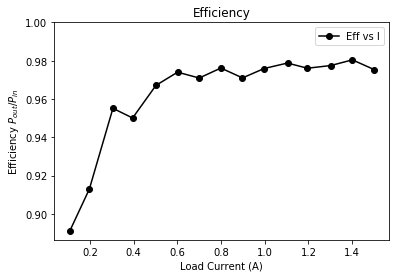

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Is,Effs, '-o', color='black', label='Eff vs I')    
plt.legend()
plt.title('Efficiency')
plt.xlabel('Load Current (A)')
plt.ylabel('Efficiency $P_{out}$/$P_{in}$')
plt.ylim(top=1)
plt.show()